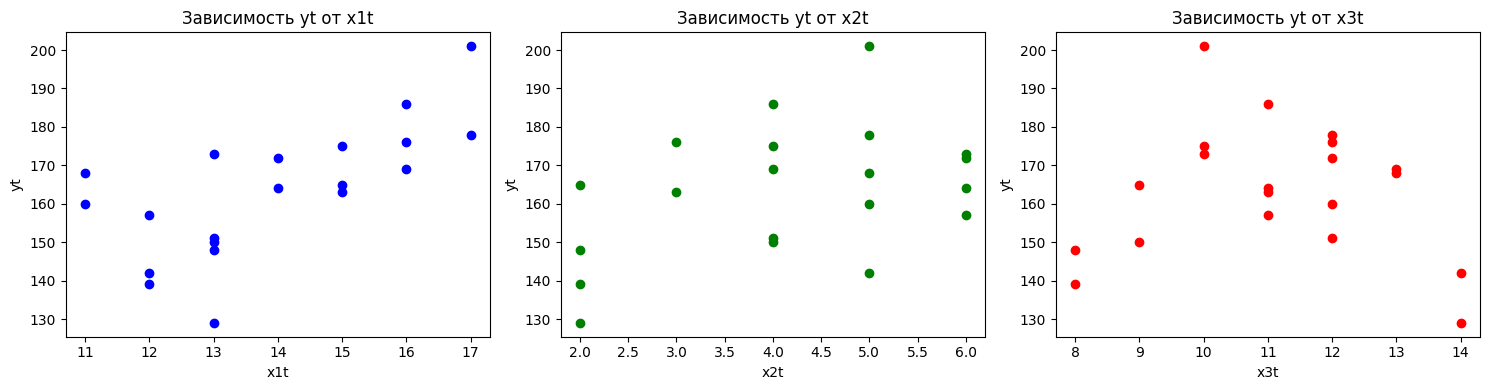

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Пример: загрузка данных (замени на свой источник)
# df = pd.read_csv("/kaggle/input/your_dataset.csv")

# Пример генерации данных для демонстрации (если файла нет)
data = {
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'x1t': [12, 17, 14, 13, 16, 15, 13, 11, 15, 12, 12, 13, 13, 16, 17, 16, 11, 14, 13, 15],
    'x2t': [2, 5, 6, 4, 3, 2, 6, 5, 4, 6, 5, 4, 2, 4, 5, 4, 5, 6, 2, 3],
    'x3t': [8, 12, 11, 9, 12, 9, 10, 13, 10, 11, 14, 12, 8, 11, 10, 13, 12, 12, 14, 11],
    'yt': [139, 178, 164, 150, 176, 165, 173, 168, 175, 157, 142, 151, 148, 186, 201, 169, 160, 172, 129, 163]
}
df = pd.DataFrame(data)

# Построение точечных графиков
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.scatter(df['x1t'], df['yt'], color='blue')
plt.xlabel('x1t')
plt.ylabel('yt')
plt.title('Зависимость yt от x1t')

plt.subplot(1, 3, 2)
plt.scatter(df['x2t'], df['yt'], color='green')
plt.xlabel('x2t')
plt.ylabel('yt')
plt.title('Зависимость yt от x2t')

plt.subplot(1, 3, 3)
plt.scatter(df['x3t'], df['yt'], color='red')
plt.xlabel('x3t')
plt.ylabel('yt')
plt.title('Зависимость yt от x3t')

plt.tight_layout()
plt.show()


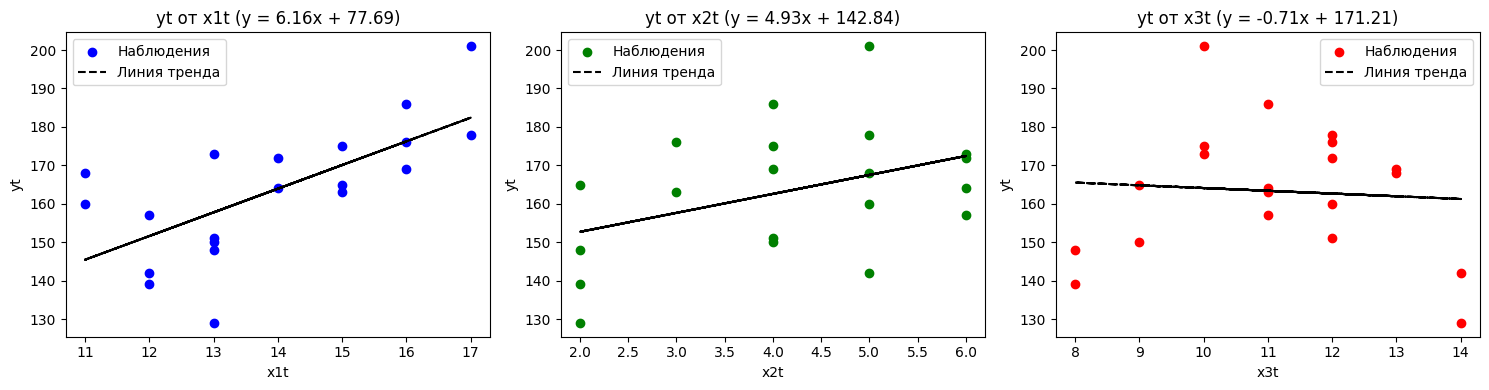

In [ ]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt

# Пример данных (замени на реальные при необходимости)

df = pd.DataFrame(data)

# Функция построения графика с линейной аппроксимацией
def plot_with_trend(x, y, xlabel, color):
    plt.scatter(x, y, color=color, label='Наблюдения')
    coef = np.polyfit(x, y, 1)           # линейная регрессия y = a*x + b
    trend = np.poly1d(coef)
    plt.plot(x, trend(x), color='black', linestyle='--', label='Линия тренда')
    plt.xlabel(xlabel)
    plt.ylabel('yt')
    plt.legend()
    return coef

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
coef1 = plot_with_trend(df['x1t'], df['yt'], 'x1t', 'blue')
plt.title(f'yt от x1t (y = {coef1[0]:.2f}x + {coef1[1]:.2f})')

plt.subplot(1, 3, 2)
coef2 = plot_with_trend(df['x2t'], df['yt'], 'x2t', 'green')
plt.title(f'yt от x2t (y = {coef2[0]:.2f}x + {coef2[1]:.2f})')

plt.subplot(1, 3, 3)
coef3 = plot_with_trend(df['x3t'], df['yt'], 'x3t', 'red')
plt.title(f'yt от x3t (y = {coef3[0]:.2f}x + {coef3[1]:.2f})')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm


# Формирование матрицы признаков и целевой переменной
X = df[['x1t', 'x2t', 'x3t']]
y = df['yt']

# Добавление константы (intercept)
X = sm.add_constant(X)

# Множественная линейная регрессия
model = sm.OLS(y, X).fit()

# Вывод результатов
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           8.42e-05
Time:                        21:33:28   Log-Likelihood:                -71.506
No. Observations:                  20   AIC:                             151.0
Df Residuals:                      16   BIC:                             155.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.1116     22.471      2.987      0.0

In [ ]:
from scipy import stats

# число степеней свободы = n - k - 1 = 20 - 3 - 1 = 16
df_resid = 16  # число степеней свободы (Residual DF)

t_95 = stats.t.ppf(0.975, df_resid)  # двусторонний интервал: 1 - (1-0.95)/2
t_90 = stats.t.ppf(0.95, df_resid)
t_99 = stats.t.ppf(0.995, df_resid)

print(f"t критическое (0.95): {t_95:.4f}")
print(f"t критическое (0.90): {t_90:.4f}")
print(f"t критическое (0.99): {t_99:.4f}")


t критическое (0.95): 2.1199
t критическое (0.90): 1.7459
t критическое (0.99): 2.9208


In [ ]:
import scipy.stats as stats
import numpy as np

order = ['const', 'x1t', 'x2t', 'x3t']
t_values = model.tvalues.reindex(order).to_numpy()   # <-- вместо хардкода
names = order
df_resid = int(model.df_resid)

# 3) Сравнение с критическими t для двустороннего теста (0.95, 0.90, 0.99)
alpha_levels = [0.05, 0.10, 0.01]  # уровни значимости для доверий 95%, 90%, 99%

# Вычисление критических t для двустороннего теста
for alpha in alpha_levels:
    t_crit = stats.t.ppf(1 - alpha/2, df_resid)
    significance = t_values.copy()
    significance = ['Significant' if abs(tv) > t_crit else 'Not significant' for tv in t_values]
    print(f"Уровень доверия {1-alpha:.2f}: критическое t = {t_crit:.3f}")
    print(f"Проверка параметров: {significance}\n")


Уровень доверия 0.95: критическое t = 2.120
Проверка параметров: ['Significant', 'Significant', 'Significant', 'Not significant']

Уровень доверия 0.90: критическое t = 1.746
Проверка параметров: ['Significant', 'Significant', 'Significant', 'Not significant']

Уровень доверия 0.99: критическое t = 2.921
Проверка параметров: ['Significant', 'Significant', 'Significant', 'Not significant']



Нормированный R2R^2R2 (Adjusted R2R^2R2) учитывает число признаков и размер выборки, корректируя обычный R2R^2R2 на возможность переобучения.
Интерпретация для оценки адекватности модели:


Высокий Adjusted R2R^2R2 (близкий к 1)


Модель хорошо объясняет вариацию зависимой переменной с учётом числа факторов.


Многочисленные признаки действительно вносят вклад, а не просто увеличивают R2R^2R2.


Предварительная оценка: модель адекватна для прогнозирования на аналогичных данных.




Значение значительно ниже 1 или сильно отличается от обычного R2R^2R2


Некоторые признаки не дают реального вклада, модель может быть переобучена.


Предварительная оценка: модель требует упрощения, удаление незначимых переменных или сбор дополнительных данных.




Сравнение с визуальной оценкой графиков и t-статистикой


Если значимые коэффициенты совпадают с трендами на точечных графиках и Adjusted R2R^2R2 высокий — модель адекватна.


Если есть расхождения (например, высокая R2R^2R2 при незначимых коэффициентах) — возможна мультиколлинеарность, переобучение или сильная корреляция между факторами.




Вывод:
Adjusted R2R^2R2 позволяет заранее оценить, насколько включённые признаки реально улучшают модель, а не просто подгоняют данные. Значение близкое к 1 вместе с логично направленными коэффициентами говорит о высокой адекватности модели.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

coefs = model.params          # коэффициенты â_j
ses   = model.bse             # стандартные ошибки s_{â_j}
T = int(model.nobs)           # число наблюдений
M = len(coefs) - 1            # число факторов (без константы)
df_resid = int(model.df_resid)  # T - M - 1
scale = np.sqrt(T / df_resid) # множитель из условия

gammas = [0.90, 0.95, 0.99]

rows = []
for g in gammas:
    alpha = 1 - g
    tcrit = t.ppf(1 - alpha/2, df_resid)  # двусторонний критический t
    for name in coefs.index:
        low  = coefs[name] - tcrit * ses[name] * scale
        high = coefs[name] + tcrit * ses[name] * scale
        rows.append([g, name, coefs[name], ses[name], tcrit, low, high])

ci_table = pd.DataFrame(rows, columns=[
    'gamma', 'param', 'coef', 'se', 't_crit', 'ci_low', 'ci_high'
]).round(4)

ci_table

,gamma,param,coef,se,t_crit,ci_low,ci_high
0,0.90,const,67.1116,22.4711,1.7459,23.2491,110.9742
1,0.90,x1t,6.5003,1.1788,1.7459,4.1994,8.8012
2,0.90,x2t,6.4417,1.6392,1.7459,3.2422,9.6413
3,0.90,x3t,-1.8828,1.3129,1.7459,-4.4454,0.6798
4,0.95,const,67.1116,22.4711,2.1199,13.8524,120.3709
5,0.95,x1t,6.5003,1.1788,2.1199,3.7065,9.2941
6,0.95,x2t,6.4417,1.6392,2.1199,2.5567,10.3268
7,0.95,x3t,-1.8828,1.3129,2.1199,-4.9944,1.2288
8,0.99,const,67.1116,22.4711,2.9208,-6.2684,140.4917
9,0.99,x1t,6.5003,1.1788,2.9208,2.6511,10.3496


In [ ]:

# Параметры модели
k = 3          # число факторов x1, x2, x3
df_resid = 16  # остаточные степени свободы (n - k - 1)
alpha_levels = [0.1, 0.05, 0.01]  # уровни значимости для доверия 0.9, 0.95, 0.99

# Расчет критических F
for alpha in alpha_levels:
    F_crit = stats.f.ppf(1 - alpha, k, df_resid)
    print(f"Уровень доверия {1-alpha:.2f}: критическое F = {F_crit:.3f}")

Уровень доверия 0.90: критическое F = 2.462
Уровень доверия 0.95: критическое F = 3.239
Уровень доверия 0.99: критическое F = 5.292


In [ ]:

# Параметры модели
R2 = model.rsquared       # исходный коэффициент детерминации
n = 20
k = 3
df1 = k
df2 = n - k - 1

# Расчет F-статистики
F_calc = (R2 / k) / ((1 - R2) / df2)
print(f"Расчетное F = {F_calc:.3f}")

# Уровни доверия
alpha_levels = [0.1, 0.05, 0.01]  # доверие 0.9, 0.95, 0.99

# Критические значения и проверка гипотезы
for alpha in alpha_levels:
    F_crit = stats.f.ppf(1 - alpha, df1, df2)
    result = "Reject H0 (significant)" if F_calc > F_crit else "Fail to reject H0 (not significant)"
    print(f"Уровень доверия {1-alpha:.2f}: критическое F = {F_crit:.3f}, вывод: {result}")

Расчетное F = 14.359
Уровень доверия 0.90: критическое F = 2.462, вывод: Reject H0 (significant)
Уровень доверия 0.95: критическое F = 3.239, вывод: Reject H0 (significant)
Уровень доверия 0.99: критическое F = 5.292, вывод: Reject H0 (significant)


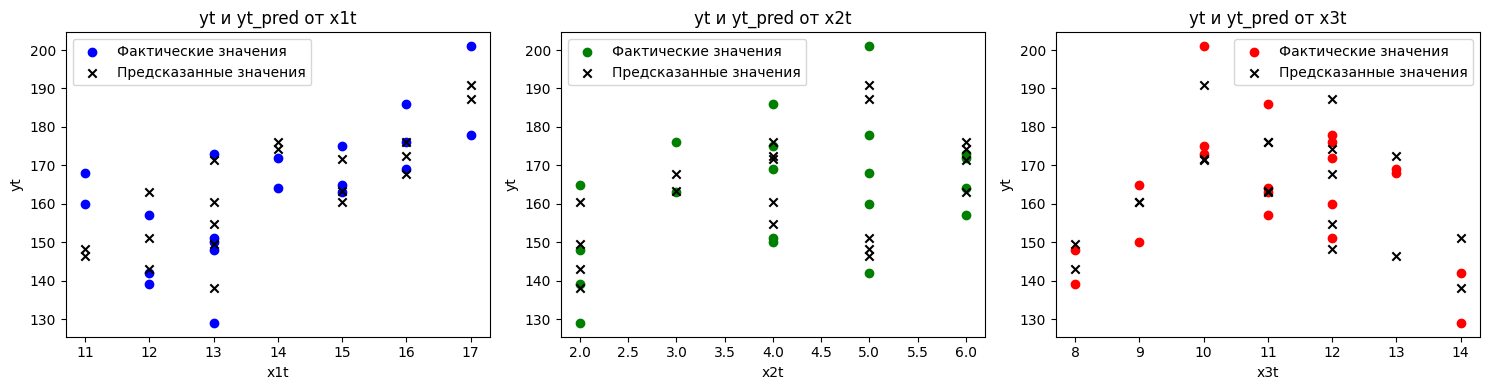

In [ ]:
y_pred = model.predict(X)

# Функция построения графика предсказанных и фактических значений
def plot_predicted_vs_actual(x, y_actual, y_predicted, xlabel, color):
    import numpy as np
    x = np.asarray(x)
    y_actual = np.asarray(y_actual)
    y_predicted = np.asarray(y_predicted)

    if y_predicted.ndim == 0:  # скаляр -> растягиваем до длины выборки
        y_predicted = np.repeat(float(y_predicted), len(y_actual))

    plt.scatter(x, y_actual, color=color, label='Фактические значения')
    plt.scatter(x, y_predicted, color='black', marker='x', label='Предсказанные значения')
    plt.xlabel(xlabel)
    plt.ylabel('yt')
    plt.legend()

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_predicted_vs_actual(df['x1t'], df['yt'], y_pred, 'x1t', 'blue')
plt.title('yt и yt_pred от x1t')

plt.subplot(1, 3, 2)
plot_predicted_vs_actual(df['x2t'], df['yt'], y_pred, 'x2t', 'green')
plt.title('yt и yt_pred от x2t')

plt.subplot(1, 3, 3)
plot_predicted_vs_actual(df['x3t'], df['yt'], y_pred, 'x3t', 'red')
plt.title('yt и yt_pred от x3t')

plt.tight_layout()
plt.show()

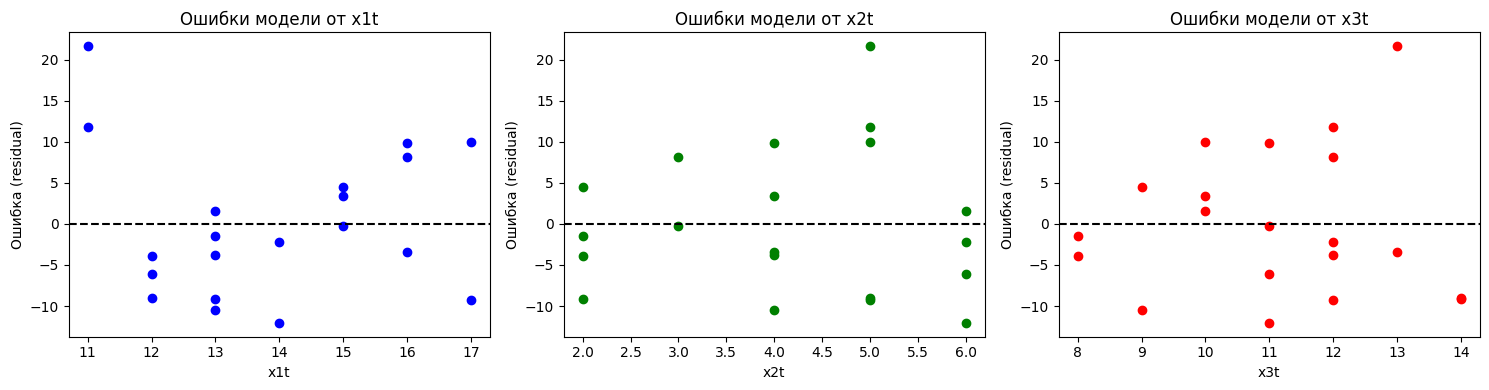

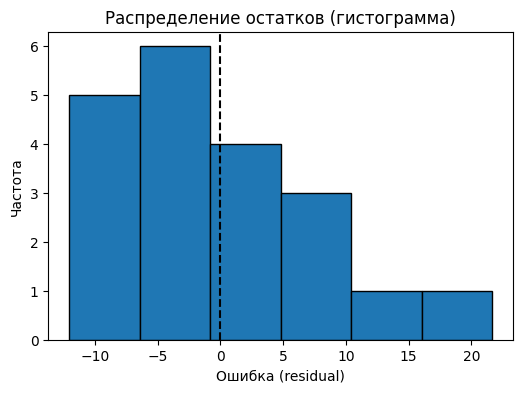

In [ ]:
# Расчет ошибок модели
residuals = y - y_pred

# Функция построения графика ошибок
def plot_residuals(x, residuals, xlabel, color):
    plt.scatter(x, residuals, color=color)
    plt.axhline(y=0, color='black', linestyle='--')  # линия нулевой ошибки
    plt.xlabel(xlabel)
    plt.ylabel('Ошибка (residual)')
    plt.title(f'Ошибки модели от {xlabel}')

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_residuals(df['x1t'], residuals, 'x1t', 'blue')

plt.subplot(1, 3, 2)
plot_residuals(df['x2t'], residuals, 'x2t', 'green')

plt.subplot(1, 3, 3)
plot_residuals(df['x3t'], residuals, 'x3t', 'red')

plt.tight_layout()
plt.show()

# --- Гистограмма распределения остатков (столбчатая диаграмма) ---
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins='auto', edgecolor='black')
plt.axvline(0, linestyle='--', color='black')
plt.xlabel('Ошибка (residual)')
plt.ylabel('Частота')
plt.title('Распределение остатков (гистограмма)')
plt.show()

In [ ]:
from scipy import stats

shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk тест: статистика={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")


# Интерпретация на уровнях 0.90, 0.95, 0.99
for alpha in (0.10, 0.05, 0.01):
    verdict = "не отвергаем H0: остатки можно считать нормальными" if shapiro_test.pvalue >= alpha \
              else "отвергаем H0: остатки отклоняются от нормальности"
    print(f"Уровень доверия {1-alpha:.2f}: {verdict}")


Shapiro-Wilk тест: статистика=0.944, p-value=0.281
Уровень доверия 0.90: не отвергаем H0: остатки можно считать нормальными
Уровень доверия 0.95: не отвергаем H0: остатки можно считать нормальными
Уровень доверия 0.99: не отвергаем H0: остатки можно считать нормальными


## 6 лаба

In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()  # Выберите ваш файл, напр. "Лабы СМАД - Sheet3(1).csv"
fname = next(iter(uploaded))  # имя загруженного файла
# попробуем с UTF-8, если ругнётся на кодировку — используйте encoding='cp1251'
df = pd.read_csv(io.BytesIO(uploaded[fname]), encoding='utf-8-sig')
df.head()
df.columns

Saving Лабы СМАД - Sheet3(1).csv to Лабы СМАД - Sheet3(1) (2).csv


Index(['Цена за квартиру в Минске (y)', 'Общая площадь (x1)',
       'Год постройки (x2)', 'Этаж (x3)', 'Количество комнат (x4)',
       'Жилая площадь (x5)'],
      dtype='object')

In [ ]:
import numpy as np

col_map = {
    'Цена за квартиру в Минске (y)': 'y',
    'Общая площадь (x1)': 'x1_total_area',
    'Год постройки (x2)': 'x2_year',
    'Этаж (x3)': 'x3_floor',
    'Количество комнат (x4)': 'x4_rooms',
    'Жилая площадь (x5)': 'x5_living_area',
}
# Если имена у вас слегка отличаются, подправьте col_map под ваши точные заголовки.
data = df.rename(columns=col_map).copy()

# Приведём всё к численным типам
for c in data.columns:
    data[c] = pd.to_numeric(data[c], errors='coerce')

# Удалим пропуски
data = data.dropna().reset_index(drop=True)

print("Размерность:", data.shape)
data.head()


Размерность: (40, 6)


,y,x1_total_area,x2_year,x3_floor,x4_rooms,x5_living_area
0,112487,38.50,1960,1,1,22.5
1,158532,28.57,2027,6,1,25.0
2,121608,29.70,1949,1,2,22.5
3,9486735,282.70,2016,6,3,282.7
4,147450,31.20,1968,2,1,17.3


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Фичи для полной модели
FEATURES = ['x1_total_area','x2_year','x3_floor','x4_rooms','x5_living_area']

# 1) Базовая подгонка на исходных данных для поиска выбросов
X0 = sm.add_constant(data[FEATURES])
y0 = data['y']
m0 = sm.OLS(y0, X0).fit()

# 2) Поиск выбросов по Cook's D и студент. остаткам
infl = OLSInfluence(m0)
cooks_d = infl.cooks_distance[0]
stud_resid = infl.resid_studentized_external

n = len(data)
mask_outliers = (cooks_d > 4/n) | (np.abs(stud_resid) > 3)

# 3) Очистка данных
data_clean = data.loc[~mask_outliers].reset_index(drop=True)
print(f"Удалено выбросов: {mask_outliers.sum()} из {n}. Осталось наблюдений: {len(data_clean)}")

# 4) Финальная модель на очищенных данных
X_all = sm.add_constant(data_clean[FEATURES])
y = data_clean['y']
m_all = sm.OLS(y, X_all).fit()


Удалено выбросов: 5 из 40. Осталось наблюдений: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     73.88
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.34e-15
Time:                        21:33:41   Log-Likelihood:                -497.58
No. Observations:                  35   AIC:                             1007.
Df Residuals:                      29   BIC:                             1016.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -1.5e+07   5.79e+06     -2.592      0.015   -2.68e+07   -3.16e+06
x1_total_area   5659.2727   1539.884      3.675      0.001    2509.857    8808.689
x2_year         7494.1392   2914.320      2.571      0.016    1533.686    1.35e+04
x3_floor       -5.911e+04   2.66e+04     -2.220      0.034   -1.14e+05   -4651.168
x4_rooms        1.302e+05   1.42e+05      0.918      0.366    -1.6e+05     4.2e+05
x5_living_area  8810.5749   3838.868      2.295      0.029     959.209    1.67e+04
==============================================================================
Omnibus:                       31.200   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.158
Skew:                           1.828   Prob(JB):                     1.46e-23
Kurtosis:                      10.664   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


P-values (все факторы, после очистки):
const             0.0148
x1_total_area     0.0010
x2_year           0.0155
x3_floor          0.0344
x4_rooms          0.3663
x5_living_area    0.0292
dtype: float64

F-статистика: 73.875   p-value(F): 1.3388466693915895e-15

Тест нормальности (Anderson–Darling): p = 0.00011090633630353584
Тест Бройша–Пагана (гетероскедастичность): p = 0.34101548018979955

VIF (после очистки):


,feature,VIF
0,x1_total_area,5.488858
1,x2_year,1.646337
2,x3_floor,2.539921
3,x4_rooms,13.296367
4,x5_living_area,14.523080


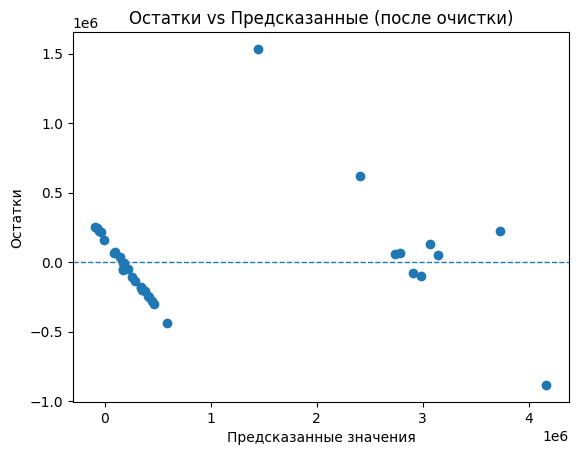

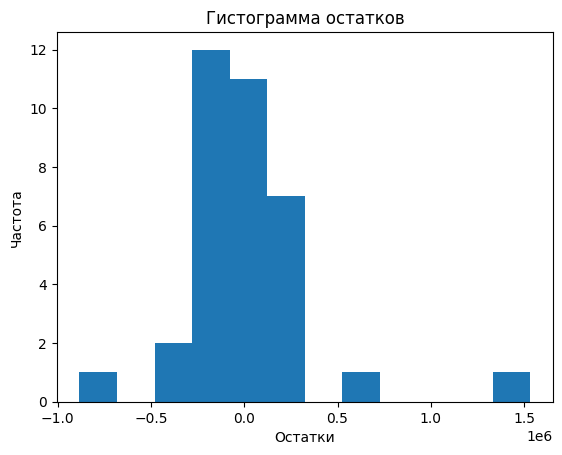

<Figure size 640x480 with 0 Axes>

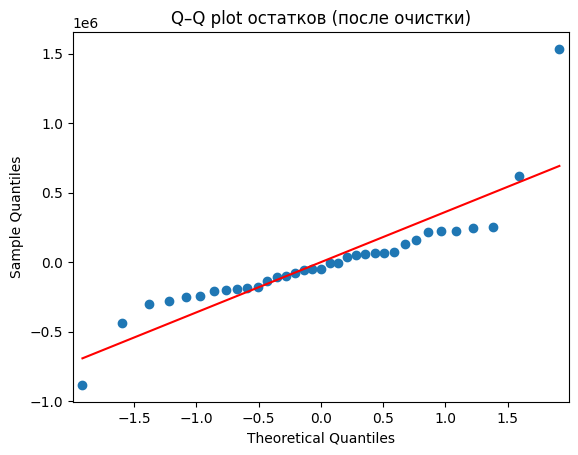


Уравнение (после очистки):
y = -15004291.445 + 5659.273*x1 + 7494.139*x2 + -59114.546*x3 + 130169.400*x4 + 8810.575*x5


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
import matplotlib.pyplot as plt

# Сводка модели
display(m_all.summary())

# Значимость коэффициентов
print("\nP-values (все факторы, после очистки):")
print(m_all.pvalues.round(4))

# Общая значимость (F-тест)
print("\nF-статистика:", round(m_all.fvalue,3), "  p-value(F):", m_all.f_pvalue)

# Диагностика остатков
ad_stat, ad_p = normal_ad(m_all.resid)
print("\nТест нормальности (Anderson–Darling): p =", ad_p)

bp_LM, bp_p, bp_F, bp_Fp = het_breuschpagan(m_all.resid, m_all.model.exog)
print("Тест Бройша–Пагана (гетероскедастичность): p =", bp_p)

# VIF (мультиколлинеарность) на очищенных данных
vif = []
for i in range(1, X_all.shape[1]):  # пропускаем константу
    vif.append({"feature": X_all.columns[i], "VIF": variance_inflation_factor(X_all.values, i)})
vif_df = pd.DataFrame(vif)
print("\nVIF (после очистки):")
display(vif_df)

# Графики диагностики
plt.figure()
plt.scatter(m_all.fittedvalues, m_all.resid)
plt.axhline(0, linestyle='--', linewidth=1)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("Остатки vs Предсказанные (после очистки)")
plt.show()

plt.figure()
plt.hist(m_all.resid, bins=12)
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.title("Гистограмма остатков")
plt.show()

plt.figure()
sm.qqplot(m_all.resid, line='s')
plt.title("Q–Q plot остатков (после очистки)")
plt.show()

# Уравнение
params = m_all.params.to_dict()
eq_all = ("y = {const:.3f} + {x1_total_area:.3f}*x1 + {x2_year:.3f}*x2 + "
          "{x3_floor:.3f}*x3 + {x4_rooms:.3f}*x4 + {x5_living_area:.3f}*x5").format(**params)
print("\nУравнение (после очистки):")
print(eq_all)


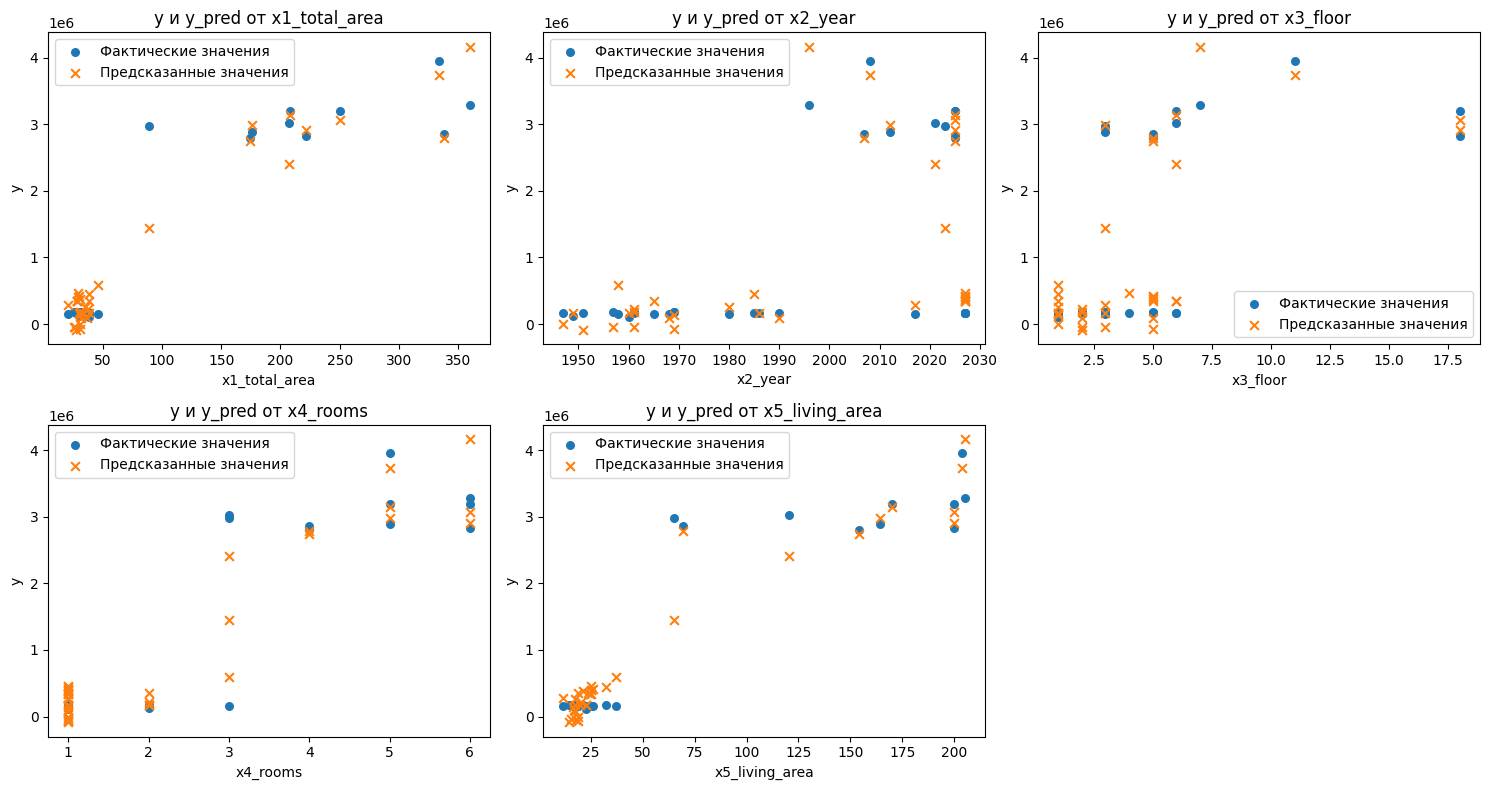

In [ ]:
import math

DATA = data_clean if 'data_clean' in globals() else data

# предсказания модели для тех же наблюдений
X_vis = sm.add_constant(DATA[FEATURES])
y_true = DATA['y'].to_numpy()
y_pred = m_all.predict(X_vis).to_numpy()


# сетка подграфиков по 3 в ряд
cols = 3
rows = math.ceil(len(FEATURES)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = np.array(axes).reshape(rows, cols)

for i, col in enumerate(FEATURES):
    r = i // cols
    c = i % cols
    ax = axes[r, c]

    x = DATA[col].to_numpy()
    ax.scatter(x, y_true, label="Фактические значения", s=30)
    ax.scatter(x, y_pred, marker='x', label="Предсказанные значения", s=40)

    ax.set_xlabel(col)
    ax.set_ylabel('y')
    ax.set_title(f"y и y_pred от {col}")
    ax.legend()

# скрыть пустые оси (если признаков меньше, чем ячеек)
for j in range(len(FEATURES), rows*cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
# ===== БЛОК ВЫВОДОВ ПО МОДЕЛИ (добавить в КОНЕЦ ноутбука) =====
import pandas as pd
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor

def collect_conclusions(model, X, name="Модель"):
    out = []
    # Качество и общая значимость
    out.append(f"— {name}: R^2={model.rsquared:.3f}, скорр. R^2={model.rsquared_adj:.3f}")
    out.append(f"  F-статистика={model.fvalue:.3f}, p(F)={model.f_pvalue:.3g} → "
               + ("уравнение в целом значимо" if model.f_pvalue < 0.05 else "уравнение в целом НЕ значимо"))
    # Нормальность и гетероскедастичность
    ad_stat, ad_p = normal_ad(model.resid)
    out.append(f"  Нормальность остатков (Anderson–Darling): p={ad_p:.4g} → "
               + ("нарушение нормальности" if ad_p < 0.05 else "нормальность не отвергается"))
    bp_LM, bp_p, bp_F, bp_Fp = het_breuschpagan(model.resid, model.model.exog)
    out.append(f"  Гетероскедастичность (Breusch–Pagan): p={bp_p:.4g} → "
               + ("есть гетероскедастичность" if bp_p < 0.05 else "гомоскедастичность"))
    # Значимые коэффициенты
    sig = []
    for k, p in model.pvalues.items():
        if k == "const":
            continue
        if p < 0.05:
            sig.append(k)
    if sig:
        out.append("  Значимые факторы (α=0.05): " + ", ".join(sig))
    else:
        out.append("  Значимые факторы (α=0.05): отсутствуют (возможно, из-за мультиколлинеарности/малой выборки)")
    # VIF
    if X is not None:
        vif_df = pd.DataFrame({
            "feature": X.columns[1:],  # без константы
            "VIF": [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
        })
        high_vif = vif_df[vif_df["VIF"] > 10]
        out.append("  VIF (мультиколлинеарность):")
        out.append(vif_df.to_string(index=False))
        if not high_vif.empty:
            out.append("  ↑ Обнаружена сильная мультиколлинеарность (VIF>10): "
                       + ", ".join(high_vif["feature"].tolist()))
    return out, ad_p, bp_p

print("\n================= ИТОГОВЫЕ ВЫВОДЫ =================")
# Основная (полная) модель
full_out, full_ad_p, full_bp_p = collect_conclusions(m_all, X_all, name="Полная модель (все факторы)")
print("\n".join(full_out))

# Короткая интерпретация знаков
print("\nИнтерпретация знаков:")
for k, v in m_all.params.items():
    if k == "const":
        continue
    direction = "↑ (положительное влияние)" if v > 0 else "↓ (отрицательное влияние)"
    print(f"  {k}: {direction} — при прочих равных, изменение признака ведёт к {('росту' if v>0 else 'снижению')} цены")
print("====================================================\n")



================= ИТОГОВЫЕ ВЫВОДЫ =================
— Полная модель (все факторы): R^2=0.927, скорр. R^2=0.915
  F-статистика=73.875, p(F)=1.34e-15 → уравнение в целом значимо
  Нормальность остатков (Anderson–Darling): p=0.0001109 → нарушение нормальности
  Гетероскедастичность (Breusch–Pagan): p=0.341 → гомоскедастичность
  Значимые факторы (α=0.05): x1_total_area, x2_year, x3_floor, x5_living_area
  VIF (мультиколлинеарность):
       feature       VIF
 x1_total_area  5.488858
       x2_year  1.646337
      x3_floor  2.539921
      x4_rooms 13.296367
x5_living_area 14.523080
  ↑ Обнаружена сильная мультиколлинеарность (VIF>10): x4_rooms, x5_living_area

Интерпретация знаков:
  x1_total_area: ↑ (положительное влияние) — при прочих равных, изменение признака ведёт к росту цены
  x2_year: ↑ (положительное влияние) — при прочих равных, изменение признака ведёт к росту цены
  x3_floor: ↓ (отрицательное влияние) — при прочих равных, изменение признака ведёт к снижению цены
  x4_rooms: ↑ (

# НАЧАЛО ПЗ7

In [ ]:
#АВТОКОРРЕЛЯЦИЯ
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Статистика Дарбина–Уотсона: {dw:.3f}")


Статистика Дарбина–Уотсона: 1.428


In [ ]:
#ГЕТЕРОСКЕДАТИЧНОСТЬ
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, X)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))


{'LM Statistic': np.float64(4.486782247038925), 'LM-Test p-value': np.float64(0.21347231524631047), 'F-Statistic': np.float64(1.542523652965124), 'F-Test p-value': np.float64(0.24209040718593655)}


In [ ]:
#МУЛЬТИКОЛЛИНЕАРНОСТЬ
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Матрица признаков без константы для VIF
X_no_const = df[['x1t', 'x2t', 'x3t']]
vif_data = pd.DataFrame()
vif_data['feature'] = X_no_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_const.values, i) for i in range(X_no_const.shape[1])]
print(vif_data)


KeyError: "None of [Index(['x1t', 'x2t', 'x3t'], dtype='object')] are in the [columns]"